<a href="https://colab.research.google.com/github/Toadoum/Spark-Foundation-Internship-in-Data-Science-BA-GRIP-/blob/main/GRIP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SAKAYO TOADOUM SARI**

### *Data Science & Business Analytics Intern at Spark Foundation*

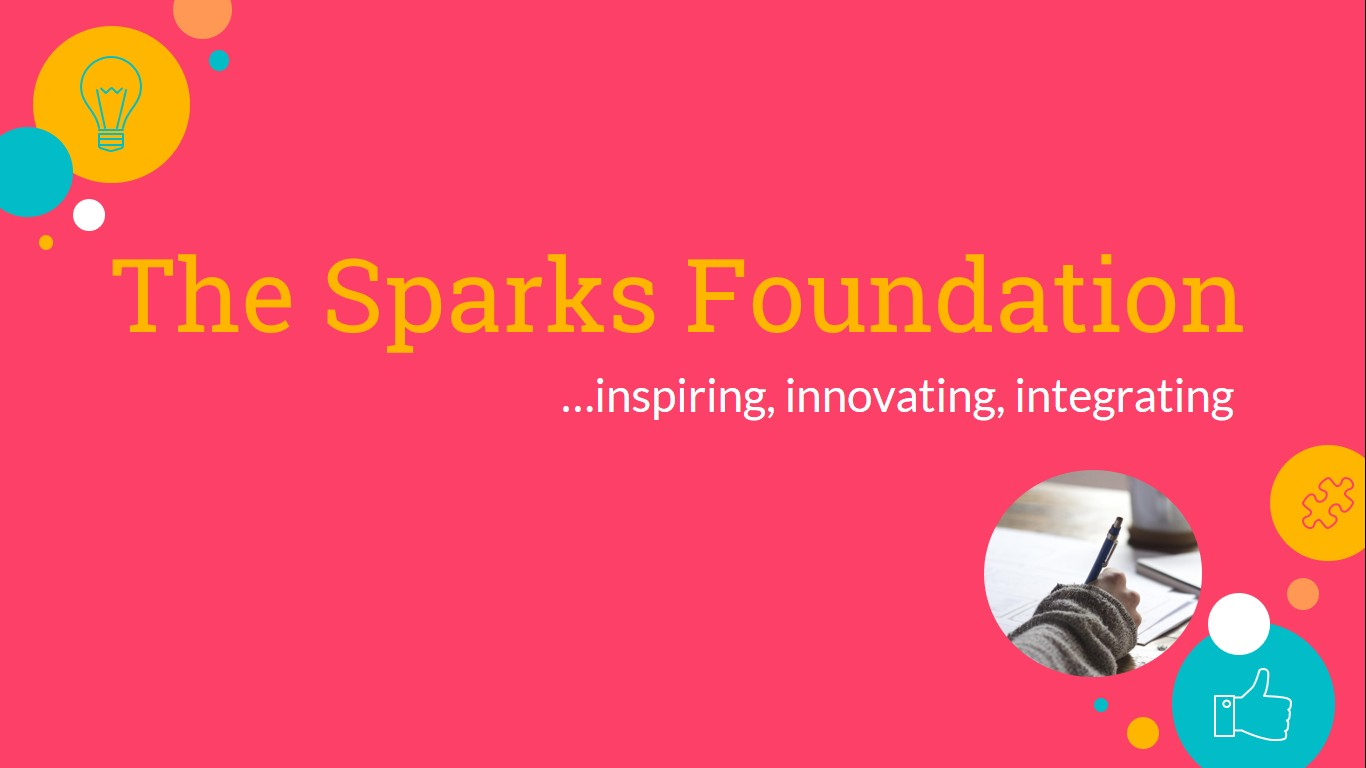

In [ ]:
from IPython.display import Image
Image(filename='/content/sparkf.jpeg')

## **TASK4**

### EXPLORATORY DATA ANALYSIS - RETAIL

### **Aim of the project: Perform Exploratory Data Analysis on SampleSuperstore data and try to find out the weak areas where a business manager can work to make more profit**

## Context

Sample superstore dataset, is a kind of a simulation where you perform extensive data analysis to deliver insights on how the company can increase its profits while minimizing the losses.

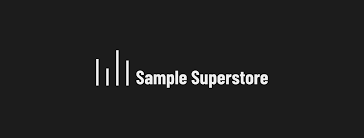

In [ ]:
from IPython.display import Image
Image(filename='/content/sample.png',height=400, width=800)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
store=pd.read_csv("/content/SampleSuperstore.csv")
store.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
store = store.drop(['Country','Postal Code','Discount'],axis=1)

In [ ]:
store.shape

(9994, 10)

* Dropping columns - Country, Postal Code, Discount, these are the fields which do not contribute much to predict the profit, sales.

In [ ]:
category_group = store.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()
segment_group = store.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()
region_group = store.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()
state_group = store.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()
shipmode_group = store.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: Futur

## **Business problems that can be derive from this data**


### *How much is the sales, profit and quantity sold varies by region, state, segment, and shipmode?*
### *Which category of items gives more profit and sold more?*
### *Which type of mode is suitable for more profit?*
### *Which country has the highest profit?*
### *Which region has the highest sales and profit?*

* Grouping the data Region-wise, State-Wise, Segment-Wise, Categry-wise and ShipMode-wise.

# Explanatory Data Analysis

### **Exploratory Analysis on Category**

In [ ]:
category_group.head(3)

,Category,Sub-Category,Sales,Quantity,Profit
0,Furniture,Bookcases,503.859633,3.807018,-15.230509
1,Furniture,Chairs,532.332420,3.818476,43.095894
2,Furniture,Furnishings,95.825668,3.723093,13.645918


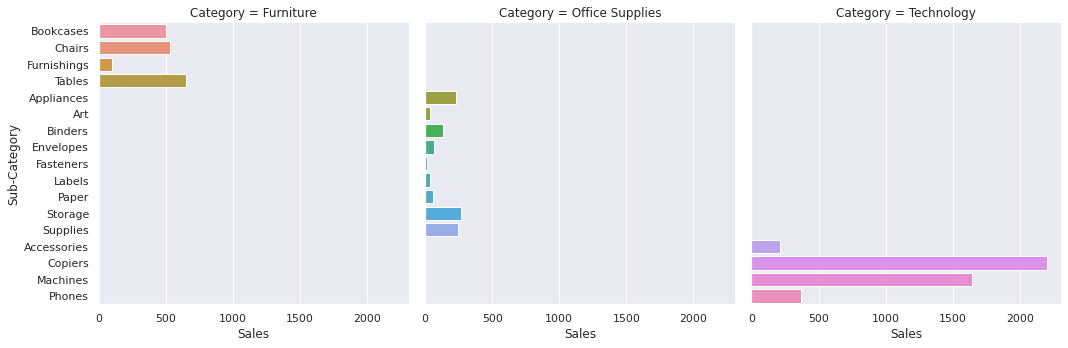

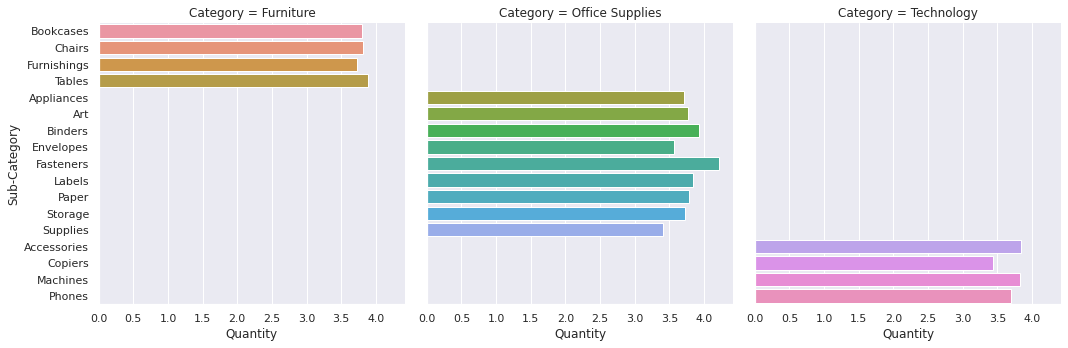

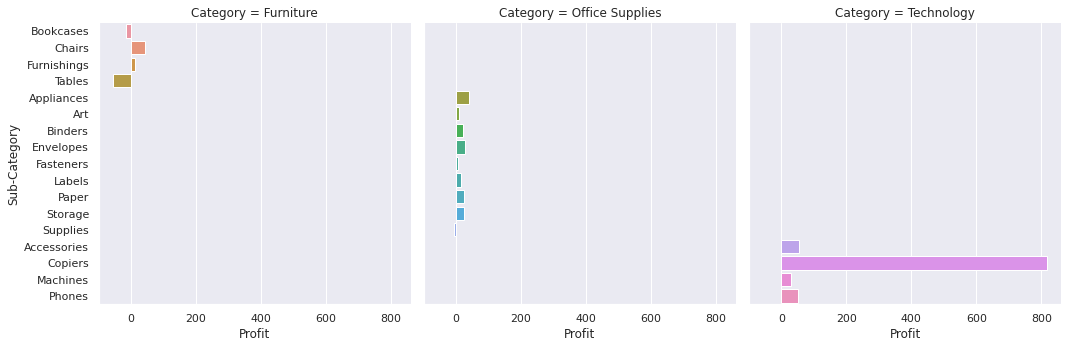

In [ ]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

Here are some observations based on the plots:
* In technology category, Sales are more than other two category.
* In technology category, Copiers and Machines are sold the most.
* Quantity of products sold in office supplies is more than the two others.
* In Furniture category, Bookcases and Tables we observe that there is a lost. Only chairs and furnishings are making some minimal profit.
* In Office Supplies category, there is a very minimal profit in all sub-categories.
* In technology category, Copiers are the most profitable among all others.

### **Exploratory Analysis on Segment**

In [ ]:
segment_group.head(3)

,Segment,Sales,Quantity,Profit
0,Consumer,223.733644,3.760547,25.836873
1,Corporate,233.823300,3.843709,30.456667
2,Home Office,240.972041,3.782389,33.818664


Text(0.5, 1.0, 'Segment Profit Gained')

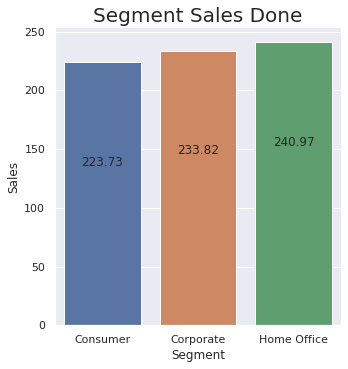

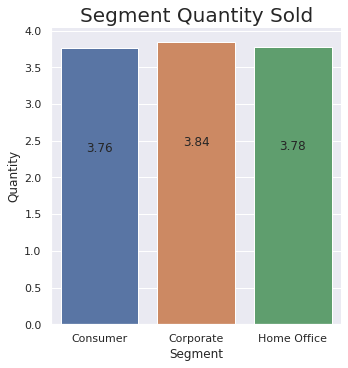

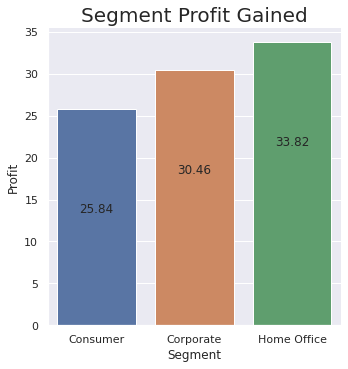

In [ ]:
x = sns.catplot(x="Segment", y="Sales", data=segment_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment Sales Done", fontsize=20)

y = sns.catplot(x="Segment", y="Quantity", data=segment_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment Quantity Sold", fontsize=20)

z = sns.catplot(x="Segment", y="Profit", data=segment_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment Profit Gained", fontsize=20)

From these graphs, we can notice that
* Home office have the highest number of sales even if there is not much difference with others.
* All types of Segments have shown almost same number of quantity sold.
* Profit gained in the Home Office segment is higher comparing other two segments and Consumer Segment is the lowest.

### **Exploratory Analysis on Region**

In [ ]:
region_group.head(3)

,Region,Sales,Quantity,Profit
0,Central,215.772661,3.779595,17.092709
1,East,238.336110,3.728230,32.135808
2,South,241.803645,3.832716,28.857673


<Figure size 1008x504 with 0 Axes>

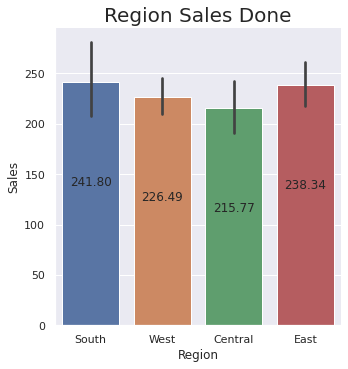

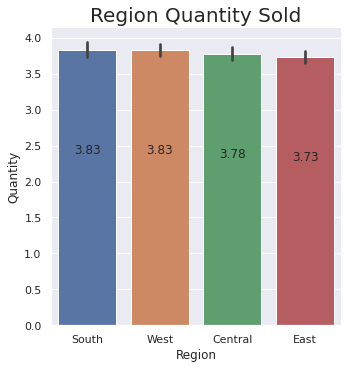

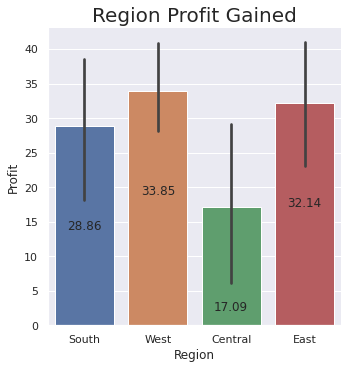

In [ ]:
fig = plt.figure(figsize=(14,7))
a = sns.catplot(x='Region',
                y='Sales',
                data=store,
                kind='bar')
for ax in a.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region Sales Done", fontsize=20)

b = sns.catplot(x='Region',
                y='Quantity',
                data=store,
                kind='bar')
for ax in b.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region Quantity Sold", fontsize=20)

c = sns.catplot(x='Region',
                y='Profit',
                data=store,
                kind='bar')
for ax in c.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that
* Sales are more in Southern and Eastern part of US.
* Quantity of products sold in all the regions are almost same.
* Profit gained in Western part of US is comparatively higher followed by Eastern part, Southern part then Central part of US.

### **Exploratory Analysis on State**

In [ ]:
state_group.head(3)

,State,Sales,Quantity,Profit
0,Alabama,319.846557,4.196721,94.865989
1,Arizona,157.508933,3.848214,-15.303235
2,Arkansas,194.635500,4.000000,66.811452


In [ ]:
sorted_sales = state_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

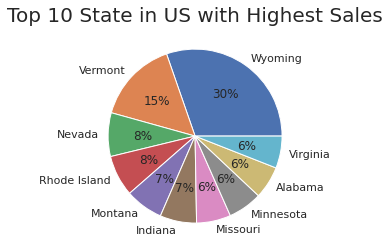

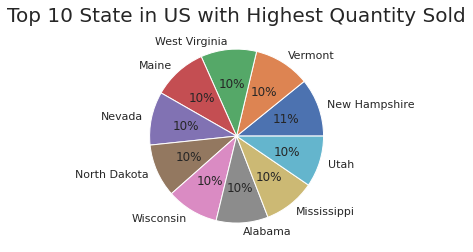

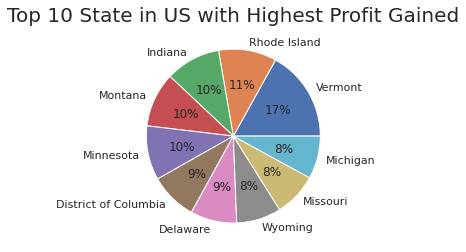

In [ ]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that
* Wyoming sales are highest among all but with a profit of only 8%.
* Almost all top 10 states have same quantity sold except New Hampshire with 11% 
* Vermont State gained the highest 17% profit among all following by Rhode Island with 11%.

In [ ]:
shipmode_group.head(3)

,Ship Mode,Sales,Quantity,Profit
0,First Class,228.497024,3.701560,31.839948
1,Same Day,236.396179,3.609576,29.266591
2,Second Class,236.089239,3.816452,29.535545


Text(0.5, 1.0, 'Shop Mode Profit Gained')

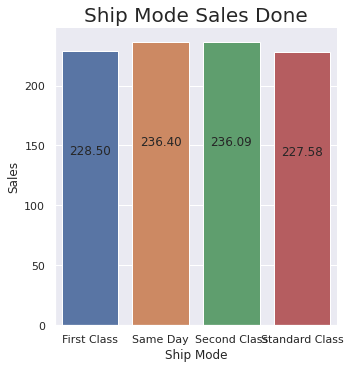

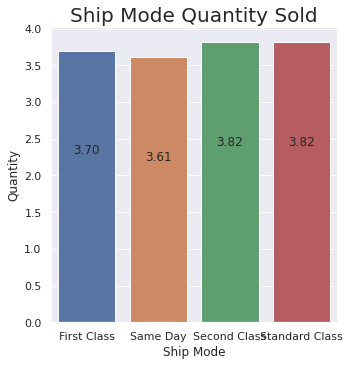

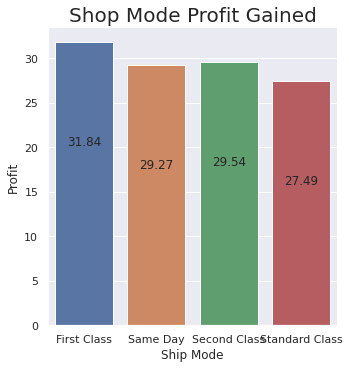

In [ ]:
x = sns.catplot(x="Ship Mode", y="Sales", data=shipmode_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode Sales Done", fontsize=20)

y = sns.catplot(x="Ship Mode", y="Quantity", data=shipmode_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode Quantity Sold", fontsize=20)

z = sns.catplot(x="Ship Mode", y="Profit", data=shipmode_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Shop Mode Profit Gained", fontsize=20)

From these graphs, we can conclude that ship mode doesn't affect Sales and Quantity. All types of Ship Mode show almost same values. But we also notice that first class give more profit compare to others

## **CONCLUSION**

From all the EDAs done above, we can infer that
* Technology Category are in demand. So if production in this field will be more, then company can get more profit.
* Profit gain is highest in Home-Office segment. Company must emphasise more to Home-Office segment.
* People in the South and East prefer most of the goods. Company must spread out their products in these part of US.
* Profit are highest in Western part of US. Company should produce more in this part of US but must come with a plan to increase the sales.
* Wyoming State have highest sales and Vermont State have the highest Profit. Company must place all types of products in these states for more profit and sales.

## **END**